In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("C:\\Users\\ERKAN\\Downloads\\data_jobs.csv")
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)

In [16]:
# size counts every column, count doesn't count NaN values
job_count = df.pivot_table(index="job_title_short", aggfunc="size")
job_count = job_count.sort_values(ascending=False)
job_count

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
dtype: int64

In [17]:
df.groupby("job_title_short").size().sort_values(ascending=False)

job_title_short
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Business Analyst              49063
Software Engineer             44929
Senior Data Engineer          44563
Senior Data Scientist         36957
Senior Data Analyst           29216
Machine Learning Engineer     14080
Cloud Engineer                12331
dtype: int64

In [18]:
df.pivot_table(values="salary_year_avg", index="job_country", columns="job_title_short", aggfunc="median").dropna()

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Australia,70000.0,110000.00,109500.00,106712.5,139216.0,101029.0,50640.0,147500.0,157500.0,118350.0
Canada,85000.0,130000.00,98500.00,105000.0,122500.0,149653.0,111175.0,125000.0,130000.0,125000.0
Colombia,120000.0,182500.00,90000.00,96773.0,128500.0,190000.0,111175.0,79200.0,70000.0,132500.0
France,89100.0,105968.00,69175.00,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.00,103750.00,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Israel,63000.0,79200.00,100500.00,128682.0,145000.0,79200.0,111175.0,147500.0,157500.0,79200.0
Philippines,63000.0,64800.00,83110.75,96773.0,75600.0,72000.0,111175.0,80786.5,72000.0,72000.0
Poland,87050.0,84150.00,89100.00,133500.0,131867.0,89100.0,111175.0,89100.0,157500.0,89100.0
Singapore,79200.0,50400.00,99500.00,98301.5,131560.0,101029.0,100500.0,147500.0,157500.0,64800.0


In [19]:
top6countries = df.job_country.value_counts().head(6).index
top6countries

Index(['United States', 'India', 'United Kingdom', 'France', 'Germany',
       'Spain'],
      dtype='object')

In [20]:
df_job_country_salary = df.pivot_table(values="salary_year_avg", index="job_country", columns="job_title_short", aggfunc="median")
df_job_country_salary = df_job_country_salary.loc[top6countries]
df_job_country_salary

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
United States,90000.0,116100.0,90000.0,125000.0,130000.0,150000.0,110000.0,150000.0,155000.0,130000.0
India,64800.0,NaN,100500.0,147500.0,114008.0,79200.0,111175.0,147500.0,149653.0,79200.0
United Kingdom,56700.0,NaN,87750.0,110000.0,105300.0,149653.0,111175.0,147500.0,157500.0,89100.0
France,89100.0,105968.0,69175.0,98301.5,88128.0,80850.0,111175.0,147500.0,157500.0,142500.0
Germany,89100.0,89100.0,103750.0,147500.0,131560.0,89100.0,111175.0,147500.0,157500.0,84975.0
Spain,86400.0,89100.0,91977.0,133000.0,88128.0,101029.0,111175.0,147500.0,157500.0,77050.0


In [21]:
job_titles = ["Data Analyst", "Data Engineer", "Data Scientist"]
df_job_country_salary = df_job_country_salary[job_titles]
df_job_country_salary 

job_title_short,Data Analyst,Data Engineer,Data Scientist
United States,90000.0,125000.0,130000.0
India,100500.0,147500.0,114008.0
United Kingdom,87750.0,110000.0,105300.0
France,69175.0,98301.5,88128.0
Germany,103750.0,147500.0,131560.0
Spain,91977.0,133000.0,88128.0


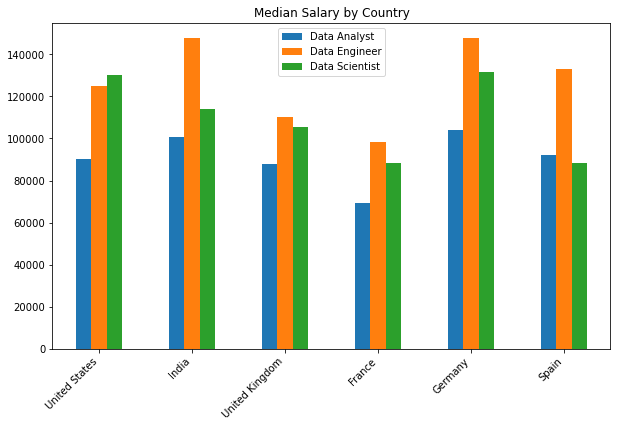

In [25]:
df_job_country_salary.plot(kind="bar", figsize=(10,6))


plt.title('Median Salary by Country')
plt.xticks(rotation=45, ha="right")
plt.legend()
plt.show()

In [ ]:
df.groupby(['job_country', 'job_title_short'])['salary_year_avg'].agg(['max', 'median', 'min']).dropna()

max     median       min
job_country job_title_short                                     
Albania     Data Analyst            56700.0   49950.00   43200.0
            Data Scientist          70000.0   69981.25   69962.5
            Senior Data Scientist  157500.0  157500.00  157500.0
Algeria     Data Analyst            44100.0   44100.00   44100.0
            Data Engineer           45000.0   45000.00   45000.0
...                                     ...        ...       ...
Vietnam     Senior Data Scientist   79200.0   79200.00   79200.0
            Software Engineer       79200.0   53600.00   28000.0
Zambia      Data Scientist          90670.0   90670.00   90670.0
Zimbabwe    Data Analyst            63000.0   63000.00   63000.0
            Data Scientist          90670.0   69085.00   47500.0

[598 rows x 3 columns]